# CSCI 4140 Assignment One

First, the exact version where we could get the exact phase. This was called **qpe** in our program

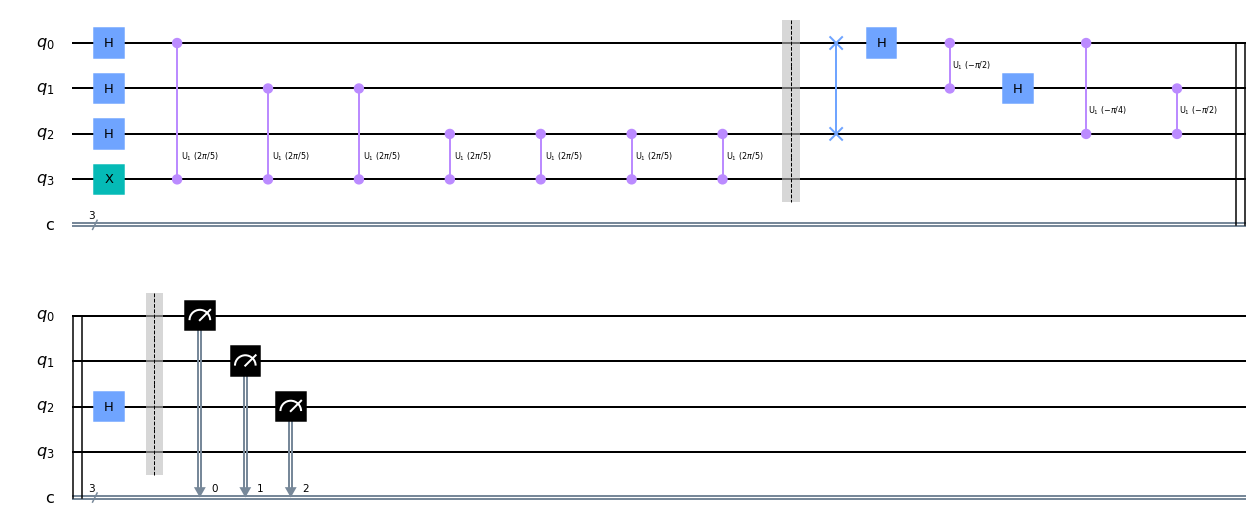

In [3]:
def qft_dagger(circ, n):
    for qubit in range(n//2):
        circ.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            circ.cu1(-pi/float(2**(j-m)), m, j)
        circ.h(j)
        
qpe = QuantumCircuit(4,3)
qpe.x(3)
for qubit in range(3):
    qpe.h(qubit)
    
angle = 2*math.pi/5
repetitions = 1

for counting_qubit in range(3):
    for i in range(repetitions):
        qpe.cu1(angle, counting_qubit, 3);
    repetitions *= 2

qpe.barrier()
qft_dagger(qpe, 3)
qpe.barrier()

for n in range(3):
    qpe.measure(n,n)

qpe.draw('mpl')

Second, the approximate version where we could only achieve an approximation of the phase. This was called **qpe2** or **qpe3** in our program.

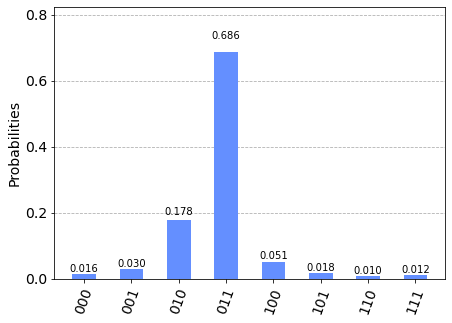

In [57]:
#qpe2 IMPLEMENTATION
qpe2 = QuantumCircuit(4,3)

for qubit in range(3):
    qpe2.h(qubit)
qpe2.x(3)

angle = 2*math.pi/3
repetitions = 1
for counting_qubit in range(3):
    for  i in range(repetitions):
        qpe2.cu1(angle, counting_qubit, 3);
    repetitions *= 2
qft_dagger(qpe2, 3)
for n in range(3):
    qpe2.measure(n,n)
    
backend = Aer.get_backend('qasm_simulator')
shots = 4096
results = execute(qpe2, backend=backend, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)

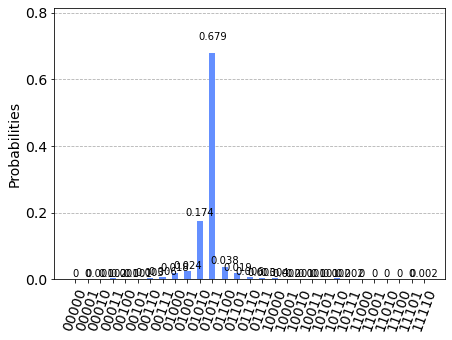

In [58]:
#qpe3 IMPLEMENTATION
qpe3 = QuantumCircuit(6,5)

for qubit in range(5):
    qpe3.h(qubit)
qpe3.x(5)

angle = 2*math.pi/3
repetitions = 1
for counting_qubit in range(5):
    for  i in range(repetitions):
        qpe3.cu1(angle, counting_qubit, 5);
    repetitions *= 2
qft_dagger(qpe3, 5)
for n in range(5):
    qpe3.measure(n,n)
    
backend = Aer.get_backend('qasm_simulator')
shots = 2048
results = execute(qpe3, backend=backend, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import math
from numpy import pi

# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

# import basic plot tools
from qiskit.visualization import plot_histogram
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise.errors import pauli_error, depolarizing_error

### GENERALIZING THE ALGORITHM
Modify both programs to have a parameter, n, which is the number of qubits.<br>
Note, the number of classical bits will also depend on n

        n = 4
        qbit = n
        cqbit = n-1
        qpen = QuantumCircuit(qbit,cqbit)

        for qubit in range(cqbit):
            qpen.h(qubit)
        qpen.x(cqbit)

        angle = 2*math.pi/3 #alter for exact or approx.
        repetitions = 1
        for counting_qubit in range(cqbit):
            for  i in range(repetitions):
                qpen.cu1(angle, counting_qubit, cqbit);
            repetitions *= 2
        qft_dagger(qpe3, cqbit)
        for n in range(cqbit):
            qpen.measure(n,n)

### ADDING NOISE
So far we have been dealing with perfect qubits, but this isn’t the case in the real world. Existing quantum computers have noise, which impact gates and measurements.<br>
**Our first question is how seriously does noise effect our results?** <br>
In order to do this we need a noise model, which I provide for you.<br> 
This noise model is in the following procedure which is similar to one in the Qiskit textbook, modified for the purposes of our experiment.<br>
This procedure is:

In [79]:
def get_noise(p_meas,p_gate):
    error_meas = pauli_error([('X',p_meas), ('I', 1 - p_meas)])
    error_gate1 = depolarizing_error(p_gate, 1)
    error_gate2 = error_gate1.tensor(error_gate1)
    noise_model = NoiseModel()
    noise_model.add_all_qubit_quantum_error(error_meas, "measure")
    noise_model.add_all_qubit_quantum_error(error_gate1, ["u1", "u2", "u3"])
    noise_model.add_all_qubit_quantum_error(error_gate2, ["cx", "cu1"])
    return noise_model

The first parameter to this procedure is the noise level for measurement. This will be left at 0.01 for our experiments. The second parameter is the gate noise level, which will be varied, but will start at 0.01.

This noise model is used in the following way:

        noise_model = get_noise(0.01,0.01)


        backend = Aer.get_backend('qasm_simulator')
        shots = 2048
        results = execute(qpen, backend=backend, shots=shots, noise_model=noise_model).result()
        answer = results.get_counts()
        plot_histogram(answer)

Now we are ready for our first experiment. 

For this experiment we will use;
- two noise levels 0.01 and 0.05 
- three numbers of qubits, 6, 8 and 10. 

We also have the exact and approximate algorithms. **This gives us 12 possible combinations to try**.<br>
Run these experiments and record your **results** in **two tables**;
- one for the exact version of the algorithm.
- one for the approximate version of the algorithm.

### For the exact version of the algorithm.

In [85]:
# Where n = 6
n = 6
qbit = n
cqbit = n-1
qpen = QuantumCircuit(qbit,cqbit)

for qubit in range(cqbit):
    qpen.h(qubit)
qpen.x(cqbit)

angle = math.pi/4
repetitions = 1
for counting_qubit in range(cqbit):
    for  i in range(repetitions):
        qpen.cu1(angle, counting_qubit, cqbit);
    repetitions *= 2
qft_dagger(qpen, cqbit)
for n in range(cqbit):
    qpen.measure(n,n)

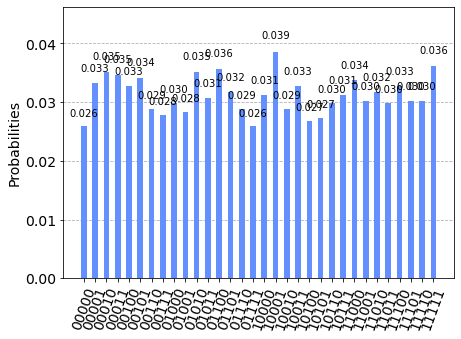

In [82]:
# Where n = 6, noise level = 0.01
noise_model = get_noise(0.01,0.01)


backend = Aer.get_backend('qasm_simulator')
shots = 2048
results = execute(qpen, backend=backend, shots=shots, noise_model=noise_model).result()
answer = results.get_counts()
plot_histogram(answer)

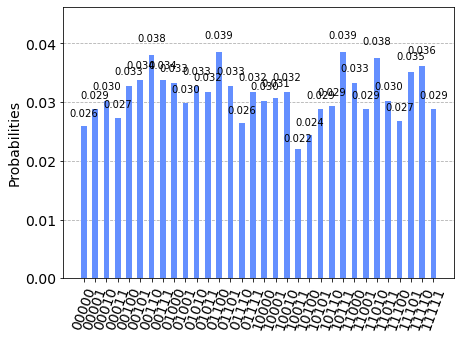

In [83]:
# Where n = 6, noise level = 0.05
noise_model = get_noise(0.05,0.05)


backend = Aer.get_backend('qasm_simulator')
shots = 2048
results = execute(qpen, backend=backend, shots=shots, noise_model=noise_model).result()
answer = results.get_counts()
plot_histogram(answer)

In [87]:
# Where n = 8
n = 8
qbit = n
cqbit = n-1
qpen = QuantumCircuit(qbit,cqbit)

for qubit in range(cqbit):
    qpen.h(qubit)
qpen.x(cqbit)

angle = math.pi/4
repetitions = 1
for counting_qubit in range(cqbit):
    for  i in range(repetitions):
        qpen.cu1(angle, counting_qubit, cqbit);
    repetitions *= 2
qft_dagger(qpen, cqbit)
for n in range(cqbit):
    qpen.measure(n,n)

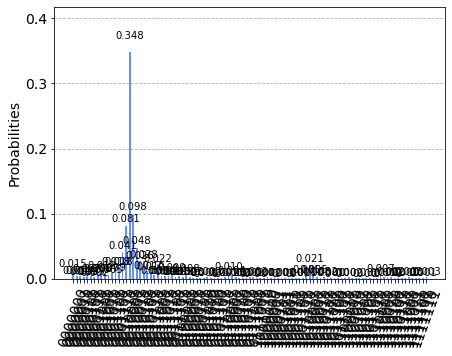

In [88]:
# Where n = 8, noise level = 0.01
noise_model = get_noise(0.01,0.01)


backend = Aer.get_backend('qasm_simulator')
shots = 2048
results = execute(qpen, backend=backend, shots=shots, noise_model=noise_model).result()
answer = results.get_counts()
plot_histogram(answer)

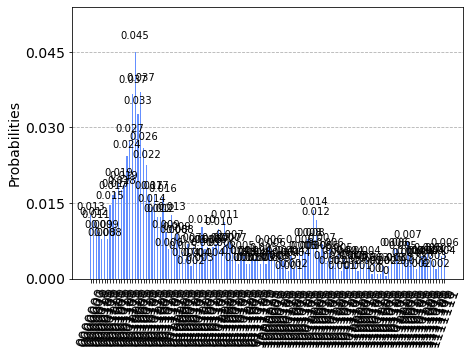

In [89]:
# Where n = 8, noise level = 0.05
noise_model = get_noise(0.05,0.05)


backend = Aer.get_backend('qasm_simulator')
shots = 2048
results = execute(qpen, backend=backend, shots=shots, noise_model=noise_model).result()
answer = results.get_counts()
plot_histogram(answer)

In [90]:
# Where n = 10
n = 10
qbit = n
cqbit = n-1
qpen = QuantumCircuit(qbit,cqbit)

for qubit in range(cqbit):
    qpen.h(qubit)
qpen.x(cqbit)

angle = math.pi/4
repetitions = 1
for counting_qubit in range(cqbit):
    for  i in range(repetitions):
        qpen.cu1(angle, counting_qubit, cqbit);
    repetitions *= 2
qft_dagger(qpen, cqbit)
for n in range(cqbit):
    qpen.measure(n,n)

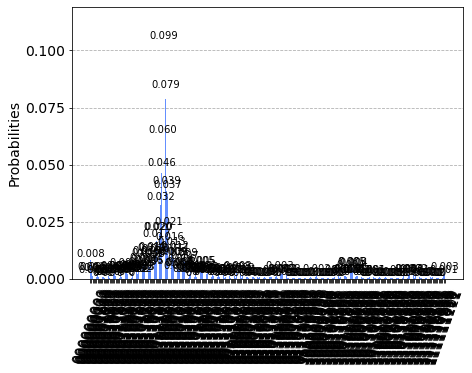

In [91]:
# Where n = 8, noise level = 0.01
noise_model = get_noise(0.01,0.01)


backend = Aer.get_backend('qasm_simulator')
shots = 2048
results = execute(qpen, backend=backend, shots=shots, noise_model=noise_model).result()
answer = results.get_counts()
plot_histogram(answer)

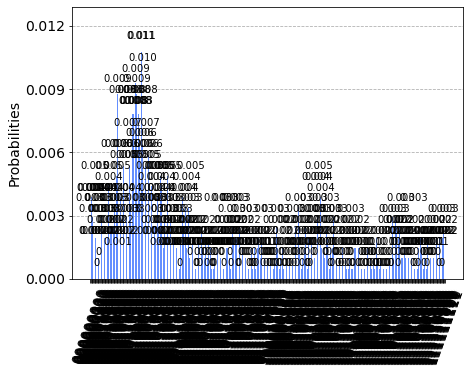

In [92]:
# Where n = 8, noise level = 0.05
noise_model = get_noise(0.05,0.05)


backend = Aer.get_backend('qasm_simulator')
shots = 2048
results = execute(qpen, backend=backend, shots=shots, noise_model=noise_model).result()
answer = results.get_counts()
plot_histogram(answer)

### For the approximate version of the algorithm.

In [93]:
#Where n = 6
n = 6
qbit = n
cqbit = n-1
qpen = QuantumCircuit(qbit,cqbit)

for qubit in range(cqbit):
    qpen.h(qubit)
qpen.x(cqbit)

angle = 2*math.pi/3
repetitions = 1
for counting_qubit in range(cqbit):
    for  i in range(repetitions):
        qpen.cu1(angle, counting_qubit, cqbit);
    repetitions *= 2
qft_dagger(qpen, cqbit)
for n in range(cqbit):
    qpen.measure(n,n)

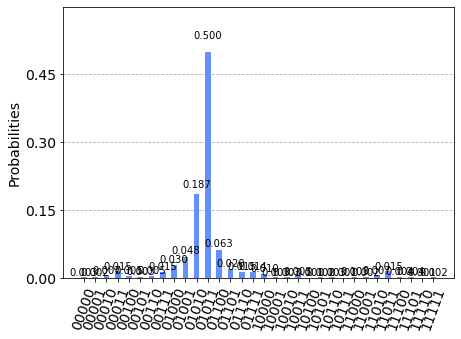

In [94]:
# Where n = 6, noise level = 0.01
noise_model = get_noise(0.01,0.01)


backend = Aer.get_backend('qasm_simulator')
shots = 2048
results = execute(qpen, backend=backend, shots=shots, noise_model=noise_model).result()
answer = results.get_counts()
plot_histogram(answer)

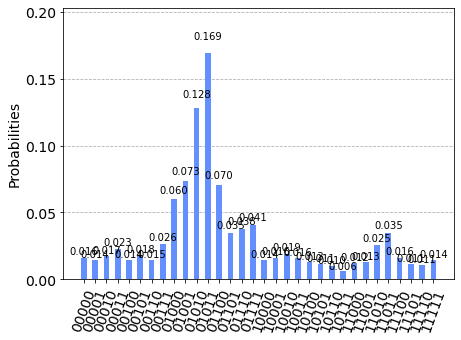

In [95]:
# Where n = 6, noise level = 0.05
noise_model = get_noise(0.05,0.05)


backend = Aer.get_backend('qasm_simulator')
shots = 2048
results = execute(qpen, backend=backend, shots=shots, noise_model=noise_model).result()
answer = results.get_counts()
plot_histogram(answer)

In [96]:
#Where n = 8
n = 8
qbit = n
cqbit = n-1
qpen = QuantumCircuit(qbit,cqbit)

for qubit in range(cqbit):
    qpen.h(qubit)
qpen.x(cqbit)

angle = 2*math.pi/3
repetitions = 1
for counting_qubit in range(cqbit):
    for  i in range(repetitions):
        qpen.cu1(angle, counting_qubit, cqbit);
    repetitions *= 2
qft_dagger(qpen, cqbit)
for n in range(cqbit):
    qpen.measure(n,n)

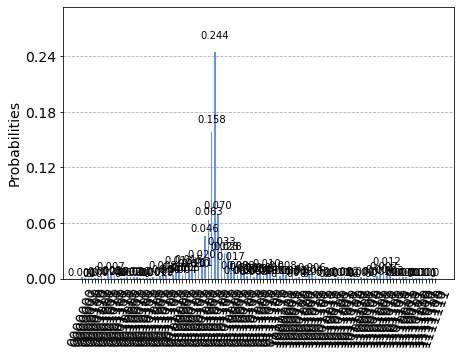

In [97]:
# Where n = 8, noise level = 0.01
noise_model = get_noise(0.01,0.01)


backend = Aer.get_backend('qasm_simulator')
shots = 2048
results = execute(qpen, backend=backend, shots=shots, noise_model=noise_model).result()
answer = results.get_counts()
plot_histogram(answer)

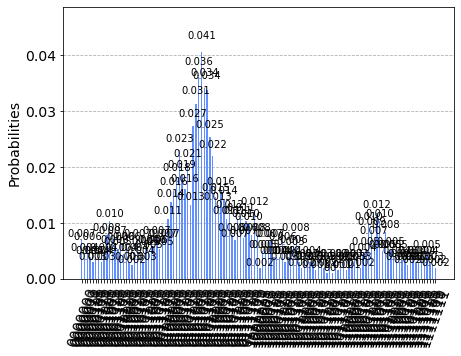

In [98]:
# Where n = 8, noise level = 0.05
noise_model = get_noise(0.05,0.05)


backend = Aer.get_backend('qasm_simulator')
shots = 2048
results = execute(qpen, backend=backend, shots=shots, noise_model=noise_model).result()
answer = results.get_counts()
plot_histogram(answer)

In [99]:
#Where n = 10
n = 10
qbit = n
cqbit = n-1
qpen = QuantumCircuit(qbit,cqbit)

for qubit in range(cqbit):
    qpen.h(qubit)
qpen.x(cqbit)

angle = 2*math.pi/3
repetitions = 1
for counting_qubit in range(cqbit):
    for  i in range(repetitions):
        qpen.cu1(angle, counting_qubit, cqbit);
    repetitions *= 2
qft_dagger(qpen, cqbit)
for n in range(cqbit):
    qpen.measure(n,n)

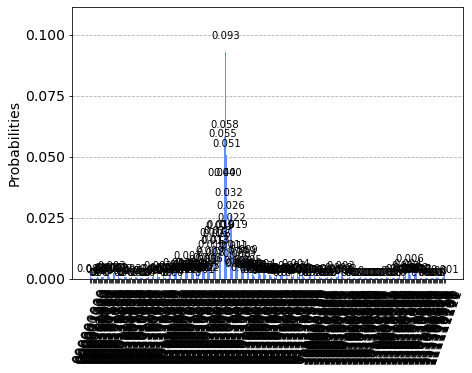

In [100]:
# Where n = 10, noise level = 0.01
noise_model = get_noise(0.01,0.01)


backend = Aer.get_backend('qasm_simulator')
shots = 2048
results = execute(qpen, backend=backend, shots=shots, noise_model=noise_model).result()
answer = results.get_counts()
plot_histogram(answer)

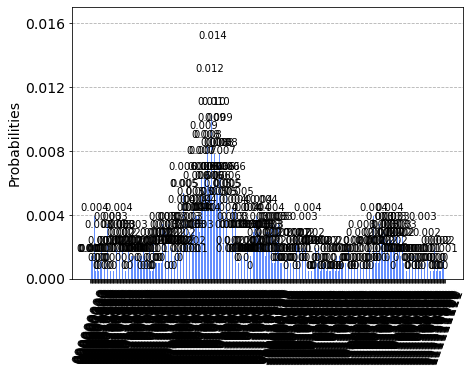

In [101]:
# Where n = 10, noise level = 0.05
noise_model = get_noise(0.05,0.05)


backend = Aer.get_backend('qasm_simulator')
shots = 2048
results = execute(qpen, backend=backend, shots=shots, noise_model=noise_model).result()
answer = results.get_counts()
plot_histogram(answer)

### NUMBER OF GATES
It is a widely held belief that with a large enough number of qubits some of the gates in the inverse quantum Fourier transform can be ignored. 

This is based on the observation that as we add more qubits, we add more gates with very small rotations. It has been argued that these rotations are hard to implement on real hardware and contribute little to the final result. 

Time for an experiment to see if this is actually the case.
The following version of the ***inverse QFT*** removes the smaller rotations:

In [106]:
def qft_limited(circ, n):
    """n-qubit QFTdagger the first n qubits in circ"""
    # Don't forget the Swaps!
    for qubit in range(n//2):
        circ.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            if (j-m) < 3:
                circ.cu1(-pi/float(2**(j-m)), m, j)
        circ.h(j)

Note, that I’ve just added a single if statement to the code that eliminates the smaller rotations. 

In this case I’m comparing j-m to 3, you can try other values, but this is a good starting point. 

Again, run an experiment with both algorithms using and 6, 8 and 10 qubits. *You can use a **single noise level** for these experiments*. 

Record your results in two tables just like you did with the previous experiment. **Do your results show that this is a good assumption?**

### For the exact version of the algorithm.

In [107]:
# Where n = 6
n = 6
qbit = n
cqbit = n-1
qpen = QuantumCircuit(qbit,cqbit)

for qubit in range(cqbit):
    qpen.h(qubit)
qpen.x(cqbit)

angle = math.pi/4
repetitions = 1
for counting_qubit in range(cqbit):
    for  i in range(repetitions):
        qpen.cu1(angle, counting_qubit, cqbit);
    repetitions *= 2
qft_limited(qpen, cqbit)
for n in range(cqbit):
    qpen.measure(n,n)

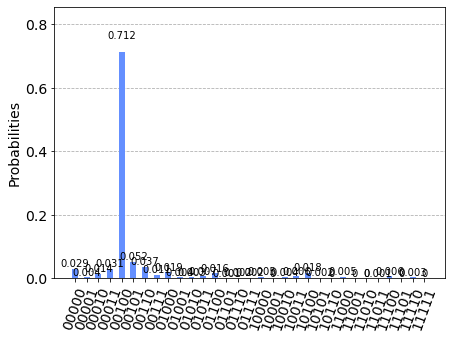

In [108]:
# Where n = 6, noise level = 0.01
noise_model = get_noise(0.01,0.01)


backend = Aer.get_backend('qasm_simulator')
shots = 2048
results = execute(qpen, backend=backend, shots=shots, noise_model=noise_model).result()
answer = results.get_counts()
plot_histogram(answer)

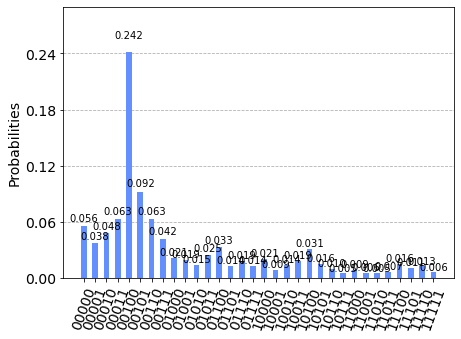

In [109]:
# Where n = 6, noise level = 0.05
noise_model = get_noise(0.05,0.05)


backend = Aer.get_backend('qasm_simulator')
shots = 2048
results = execute(qpen, backend=backend, shots=shots, noise_model=noise_model).result()
answer = results.get_counts()
plot_histogram(answer)

In [110]:
# Where n = 8
n = 6
qbit = n
cqbit = n-1
qpen = QuantumCircuit(qbit,cqbit)

for qubit in range(cqbit):
    qpen.h(qubit)
qpen.x(cqbit)

angle = math.pi/4
repetitions = 1
for counting_qubit in range(cqbit):
    for  i in range(repetitions):
        qpen.cu1(angle, counting_qubit, cqbit);
    repetitions *= 2
qft_limited(qpen, cqbit)
for n in range(cqbit):
    qpen.measure(n,n)

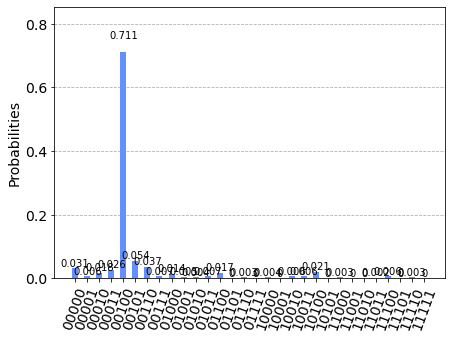

In [111]:
# Where n = 8, noise level = 0.01
noise_model = get_noise(0.01,0.01)


backend = Aer.get_backend('qasm_simulator')
shots = 2048
results = execute(qpen, backend=backend, shots=shots, noise_model=noise_model).result()
answer = results.get_counts()
plot_histogram(answer)

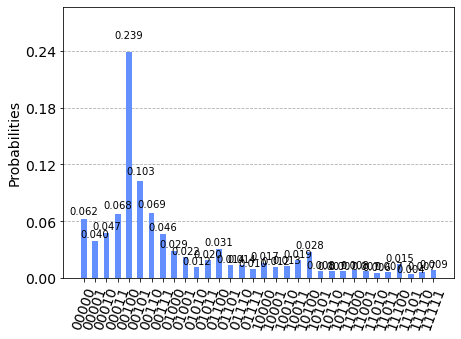

In [112]:
# Where n = 8, noise level = 0.05
noise_model = get_noise(0.05,0.05)


backend = Aer.get_backend('qasm_simulator')
shots = 2048
results = execute(qpen, backend=backend, shots=shots, noise_model=noise_model).result()
answer = results.get_counts()
plot_histogram(answer)

In [113]:
# Where n = 10
n = 10
qbit = n
cqbit = n-1
qpen = QuantumCircuit(qbit,cqbit)

for qubit in range(cqbit):
    qpen.h(qubit)
qpen.x(cqbit)

angle = math.pi/4
repetitions = 1
for counting_qubit in range(cqbit):
    for  i in range(repetitions):
        qpen.cu1(angle, counting_qubit, cqbit);
    repetitions *= 2
qft_limited(qpen, cqbit)
for n in range(cqbit):
    qpen.measure(n,n)

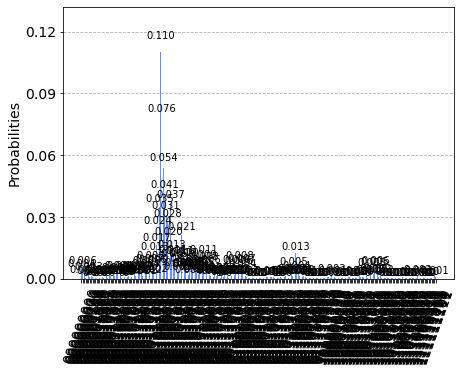

In [114]:
# Where n = 10, noise level = 0.01
noise_model = get_noise(0.01,0.01)


backend = Aer.get_backend('qasm_simulator')
shots = 2048
results = execute(qpen, backend=backend, shots=shots, noise_model=noise_model).result()
answer = results.get_counts()
plot_histogram(answer)

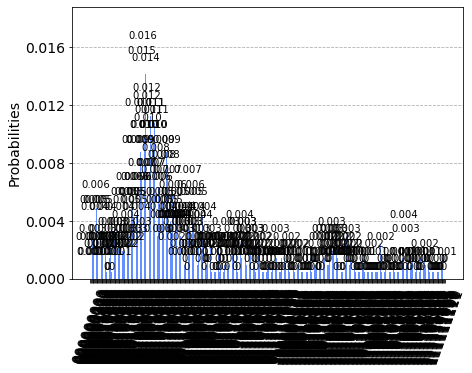

In [115]:
# Where n = 10, noise level = 0.05
noise_model = get_noise(0.05,0.05)


backend = Aer.get_backend('qasm_simulator')
shots = 2048
results = execute(qpen, backend=backend, shots=shots, noise_model=noise_model).result()
answer = results.get_counts()
plot_histogram(answer)

### For the approximate version of the algorithm.

In [116]:
# Where n = 6
n = 6
qbit = n
cqbit = n-1
qpen = QuantumCircuit(qbit,cqbit)

for qubit in range(cqbit):
    qpen.h(qubit)
qpen.x(cqbit)

angle = 2*math.pi/3
repetitions = 1
for counting_qubit in range(cqbit):
    for  i in range(repetitions):
        qpen.cu1(angle, counting_qubit, cqbit);
    repetitions *= 2
qft_limited(qpen, cqbit)
for n in range(cqbit):
    qpen.measure(n,n)

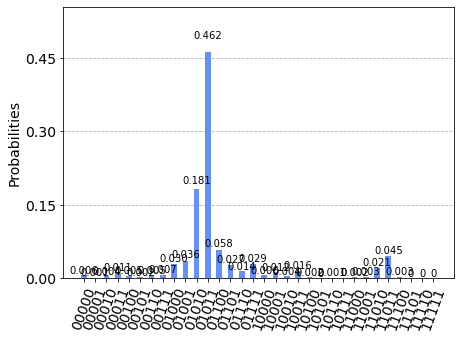

In [117]:
# Where n = 6, noise level = 0.01
noise_model = get_noise(0.01,0.01)


backend = Aer.get_backend('qasm_simulator')
shots = 2048
results = execute(qpen, backend=backend, shots=shots, noise_model=noise_model).result()
answer = results.get_counts()
plot_histogram(answer)

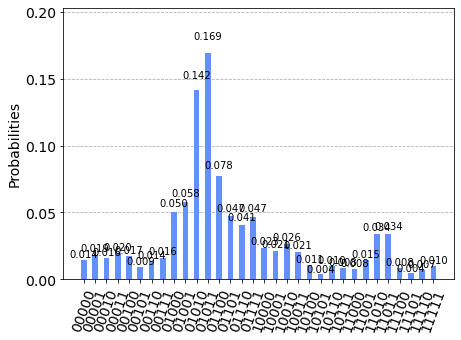

In [118]:
# Where n = 6, noise level = 0.05
noise_model = get_noise(0.05,0.05)


backend = Aer.get_backend('qasm_simulator')
shots = 2048
results = execute(qpen, backend=backend, shots=shots, noise_model=noise_model).result()
answer = results.get_counts()
plot_histogram(answer)

In [119]:
# Where n = 8
n = 8
qbit = n
cqbit = n-1
qpen = QuantumCircuit(qbit,cqbit)

for qubit in range(cqbit):
    qpen.h(qubit)
qpen.x(cqbit)

angle = 2*math.pi/3
repetitions = 1
for counting_qubit in range(cqbit):
    for  i in range(repetitions):
        qpen.cu1(angle, counting_qubit, cqbit);
    repetitions *= 2
qft_limited(qpen, cqbit)
for n in range(cqbit):
    qpen.measure(n,n)

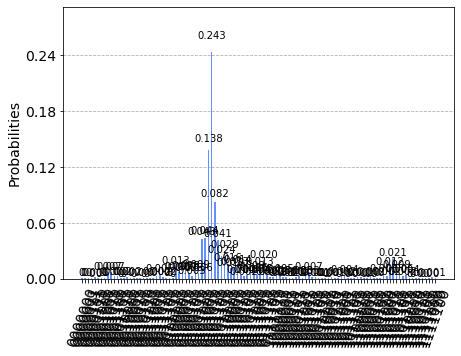

In [120]:
# Where n = 8, noise level = 0.01
noise_model = get_noise(0.01,0.01)


backend = Aer.get_backend('qasm_simulator')
shots = 2048
results = execute(qpen, backend=backend, shots=shots, noise_model=noise_model).result()
answer = results.get_counts()
plot_histogram(answer)

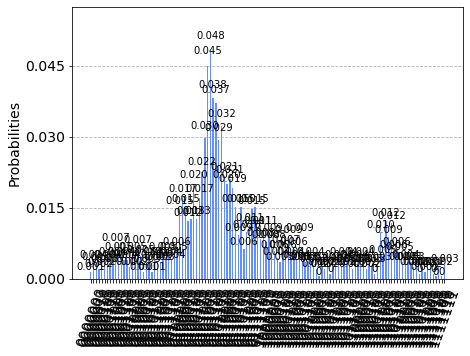

In [121]:
# Where n = 8, noise level = 0.05
noise_model = get_noise(0.05,0.05)


backend = Aer.get_backend('qasm_simulator')
shots = 2048
results = execute(qpen, backend=backend, shots=shots, noise_model=noise_model).result()
answer = results.get_counts()
plot_histogram(answer)

In [122]:
# Where n = 10
n = 10
qbit = n
cqbit = n-1
qpen = QuantumCircuit(qbit,cqbit)

for qubit in range(cqbit):
    qpen.h(qubit)
qpen.x(cqbit)

angle = 2*math.pi/3
repetitions = 1
for counting_qubit in range(cqbit):
    for  i in range(repetitions):
        qpen.cu1(angle, counting_qubit, cqbit);
    repetitions *= 2
qft_limited(qpen, cqbit)
for n in range(cqbit):
    qpen.measure(n,n)

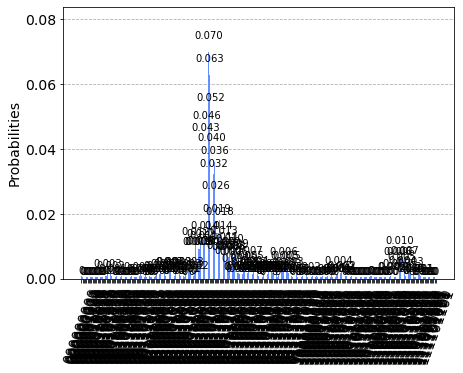

In [123]:
# Where n = 10, noise level = 0.01
noise_model = get_noise(0.01,0.01)


backend = Aer.get_backend('qasm_simulator')
shots = 2048
results = execute(qpen, backend=backend, shots=shots, noise_model=noise_model).result()
answer = results.get_counts()
plot_histogram(answer)

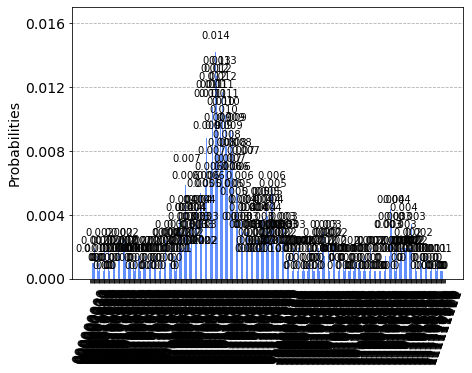

In [124]:
# Where n = 10, noise level = 0.05
noise_model = get_noise(0.05,0.05)


backend = Aer.get_backend('qasm_simulator')
shots = 2048
results = execute(qpen, backend=backend, shots=shots, noise_model=noise_model).result()
answer = results.get_counts()
plot_histogram(answer)